In [6]:
OFFSET = 3000
SKIP_SIZE = 28
TARGET_CHANNEL = 15

## Running your solution for every experiment

In [2]:
%%bash
mkdir -p predictions
for i in {0..9}; do
    python interactive_runner.py "train-online.h5" "experiment_$i" \
           "./baseline_solution.py" "python" "predictions/$i.txt"
done

Process is terminated.


## Read dataset

In [7]:
import h5py
import numpy as np

%matplotlib inline
import seaborn as sns

In [8]:
def read_prediction(filename):
    with open(filename, 'r') as fin:
        return np.array([float(line) for line in fin])

In [9]:
with h5py.File('train-online.h5') as train_file:
    data = {experiment_id: np.array(experiment_data) for experiment_id, experiment_data in train_file.items()}

In [26]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math as m

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

numpy.random.seed(7)

In [16]:
all_data = np.concatenate(list(data.values()))
all_data.shape

(299440, 21)

In [38]:
scaler = MinMaxScaler()
all_data = scaler.fit_transform(all_data)
target_variable = np.roll(all_data[:, TARGET_CHANNEL], SKIP_SIZE)

print(all_data.shape)
print(target_variable.shape)

(299440, 21)
(299440,)


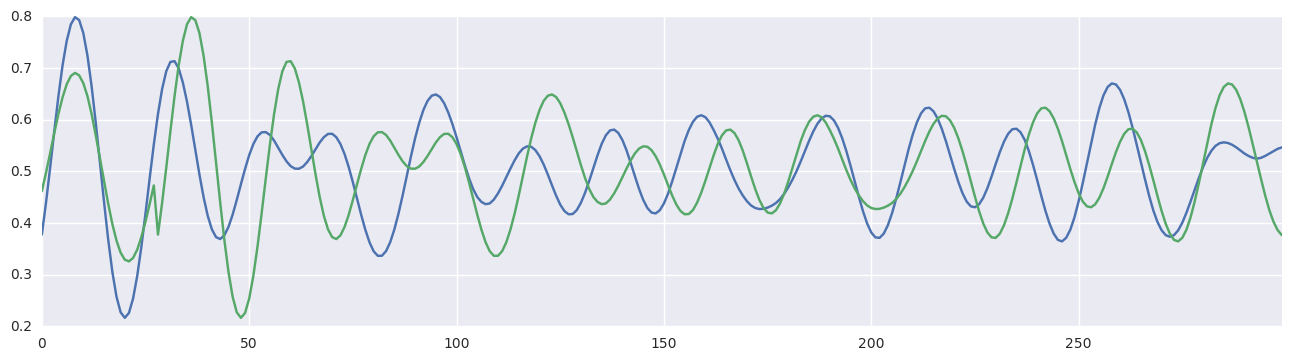

In [43]:
pd.Series(all_data[:, TARGET_CHANNEL])[:300].plot()
pd.Series(target_variable)[:300].plot(figsize=(16, 4))

In [55]:
all_data = numpy.reshape(all_data, (all_data.shape[0], 1, all_data.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(all_data, target_variable)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(224580, 1, 21) (74860, 1, 21) (224580,) (74860,)


In [ ]:
model = Sequential()
model.add(LSTM(4, input_dim=21))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, nb_epoch=100, batch_size=1, verbose=5, validation_data=(X_test, y_test))

Train on 224580 samples, validate on 74860 samples
Epoch 1/100


## Plot target channel vs prediction

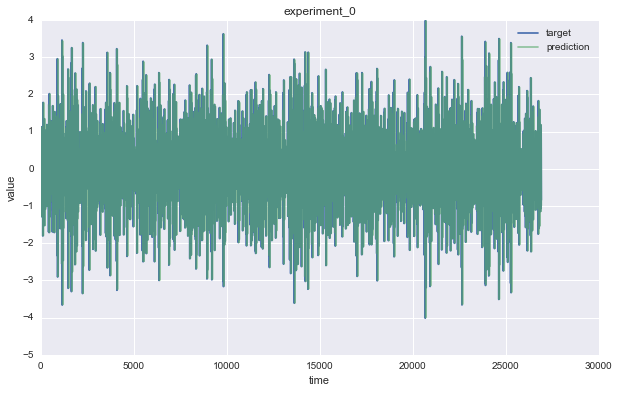

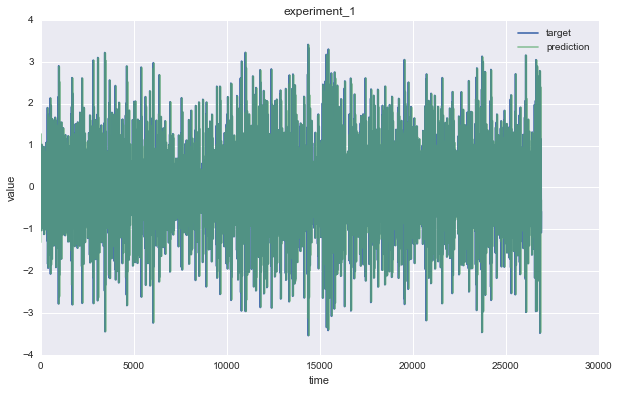

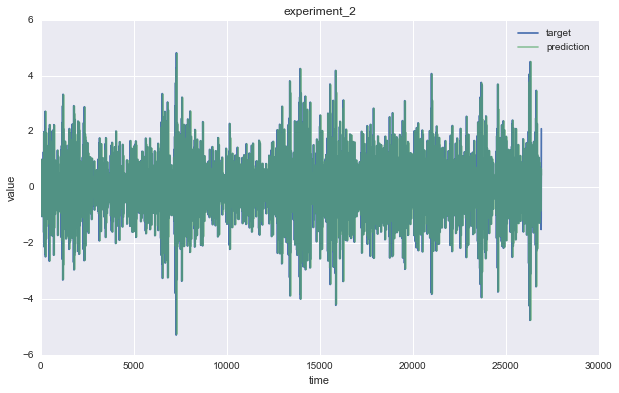

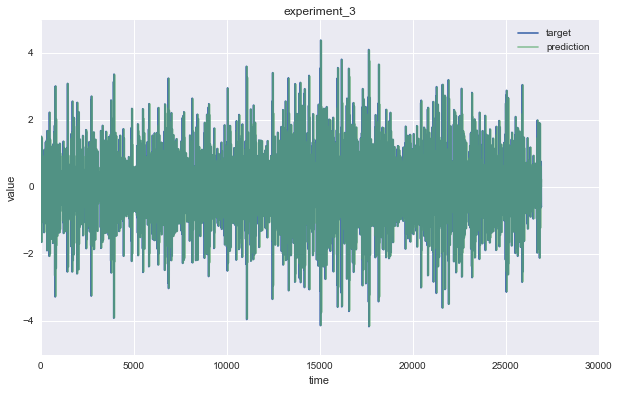

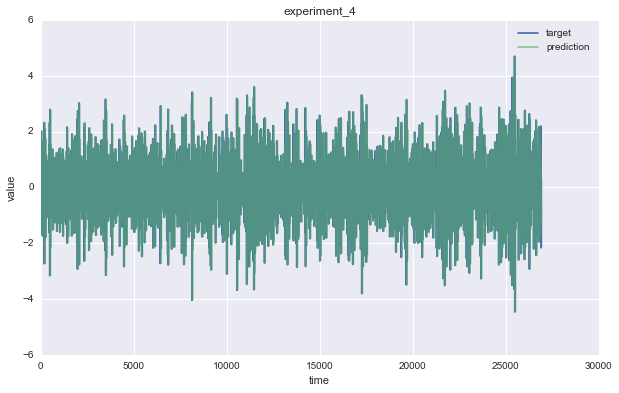

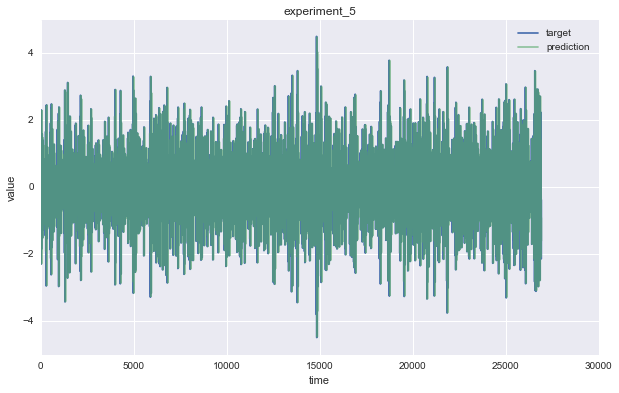

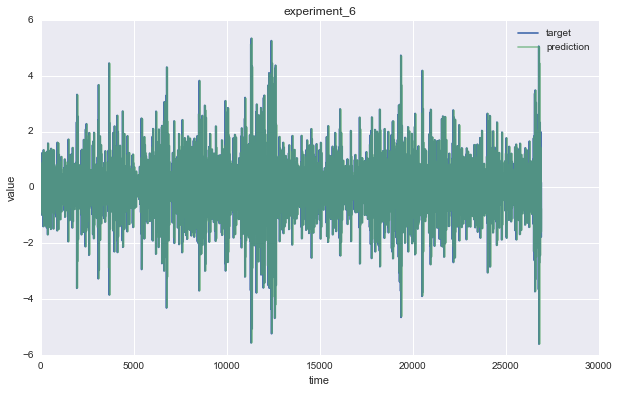

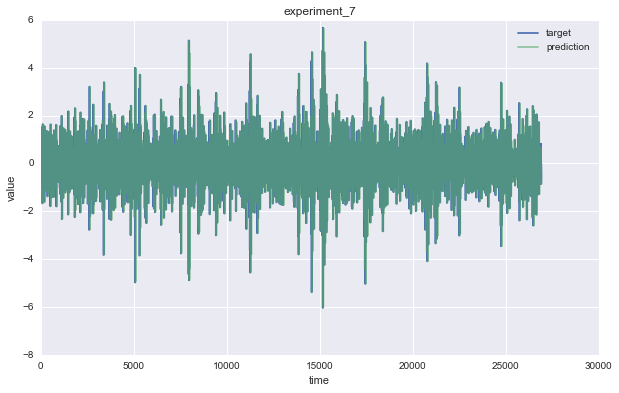

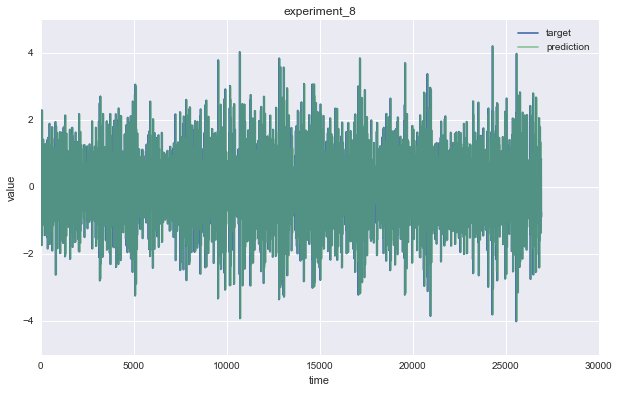

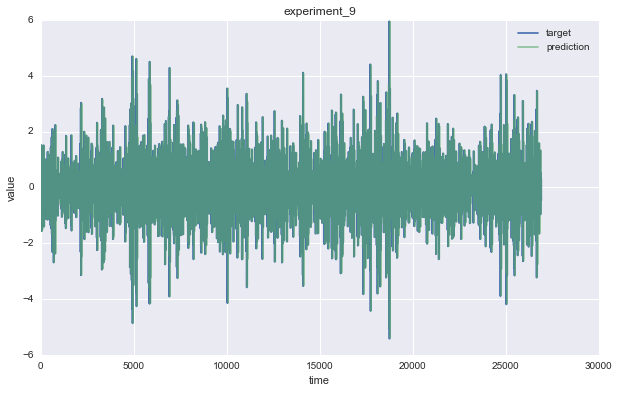

In [9]:
for i, (experiment_id, experiment_data) in enumerate(sorted(data.items())):
    target = experiment_data[OFFSET + SKIP_SIZE - 1:, TARGET_CHANNEL]
    prediction = read_prediction('predictions/{}.txt'.format(i))
    
    sns.plt.figure(figsize=(10, 6))
    sns.plt.plot(target)
    sns.plt.plot(prediction, alpha=0.6)
    sns.plt.legend(['target', 'prediction'])
    sns.plt.title(experiment_id)
    sns.plt.xlabel('time')
    sns.plt.ylabel('value')